<a href="https://colab.research.google.com/github/Arminhosseini/Justice_in_work/blob/main/justice_in_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
dataset = df.dropna()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['id'] = le.fit_transform(dataset['id'])
dataset['ProId'] = le.fit_transform(dataset['ProId'])
dataset['CustId'] = le.fit_transform(dataset['CustId'])
dataset['ServiceId'] = le.fit_transform(dataset['ServiceId'])
dataset['CategoryId'] = le.fit_transform(dataset['CategoryId'])
dataset['ZoneId'] = le.fit_transform(dataset['ZoneId'])
dataset['TargetProId'] = le.fit_transform(dataset['TargetProId'])
dataset['isFraud'] = le.fit_transform(dataset['isFraud'])
# dataset.head()

In [ ]:
cols = [col for col in dataset.columns if col not in ['isFraud','id','TaskState']]
data = dataset[cols]
target = dataset['isFraud']
# data.head(n=2)

In [ ]:
cat_vars=['ProId','CustId','Rate','ServiceId','CategoryId','ZoneId']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['ProId','CustId','Rate','ServiceId','CategoryId','ZoneId']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
# data_final.columns.values

In [ ]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(data_final, target, test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1622, 3091)
Number transactions y_train dataset:  (1622,)
Number transactions X_test dataset:  (406, 3091)
Number transactions y_test dataset:  (406,)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc_model = LinearSVC(random_state=0)
pred = svc_model.fit(X_train, y_train).predict(X_test)
print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.9384236453201971


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       381
           1       0.00      0.00      0.00        25

    accuracy                           0.94       406
   macro avg       0.47      0.50      0.48       406
weighted avg       0.88      0.94      0.91       406



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 123
Before OverSampling, counts of label '0': 1499 

After OverSampling, the shape of train_X: (2998, 3091)
After OverSampling, the shape of train_y: (2998,) 

After OverSampling, counts of label '1': 1499
After OverSampling, counts of label '0': 1499


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# from sklearn.model_selection import train_test_split
# data_train, data_test, target_train, target_test = train_test_split(data_final,target, test_size = 0.30, random_state = 10)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data_train)

# data_train = scaler.transform(data_train)
# data_test = scaler.transform(data_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc_model = LinearSVC(random_state=0)
pred = svc_model.fit(X_train_res, y_train_res.ravel()).predict(X_test)
print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.06157635467980296


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       381
           1       0.06      1.00      0.12        25

    accuracy                           0.06       406
   macro avg       0.03      0.50      0.06       406
weighted avg       0.00      0.06      0.01       406



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(target_test, pred)
print(confusion_matrix)

[[474  94]
 [ 25  16]]


In [ ]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

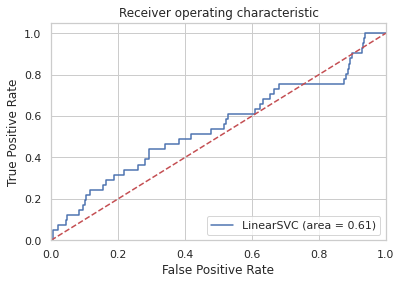

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(data_train, target_train)
logit_roc_auc = roc_auc_score(target_test, svc_model.predict(data_test))
fpr, tpr, thresholds = roc_curve(target_test, clf.predict_proba(data_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LinearSVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_res, y_train_res)
pred = neigh.predict(X_test)
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.8522167487684729


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[342  39]
 [ 21   4]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       381
           1       0.09      0.16      0.12        25

    accuracy                           0.85       406
   macro avg       0.52      0.53      0.52       406
weighted avg       0.89      0.85      0.87       406



In [ ]:
import numpy as np

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res, y_train_res)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

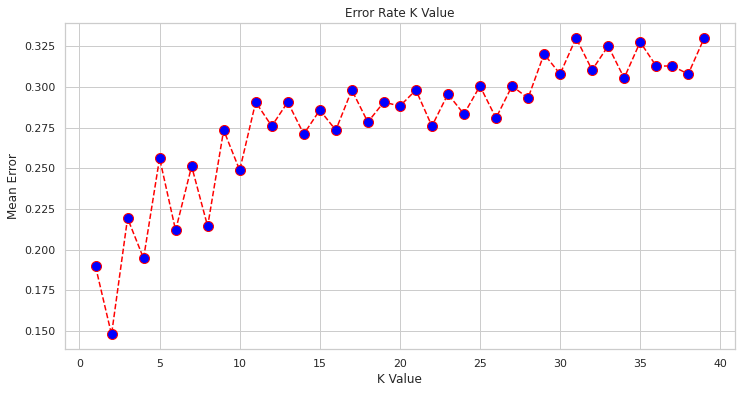

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

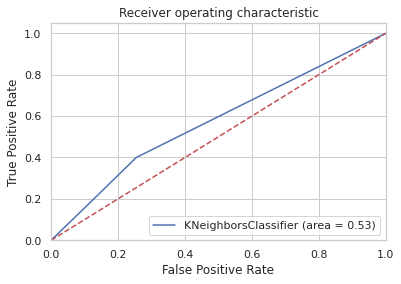

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, neigh.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighborsClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.9244663382594417


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(target_test, pred)
print(confusion_matrix)

[[563   5]
 [ 41   0]]


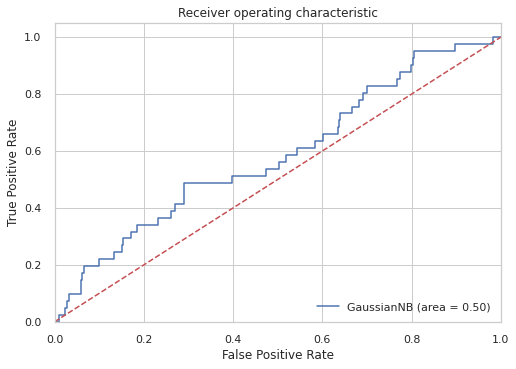

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(target_test, gnb.predict(data_test))
fpr, tpr, thresholds = roc_curve(target_test, gnb.predict_proba(data_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GaussianNB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()